In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Collection

In [2]:
#Extracting Data
df=pd.read_csv('Diabetes.csv')
df
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
#Skinthickness=fat,BMI=body mass idex:weight/i^2

Pregnancies=time period of pregnancies
Glucose=plasma glucose concn a 2 hour i an oral glucose tolerance test
bloodPressure=mm Hg
skinthickness= fat(mm
insulin=mu U/ml


In [3]:
df.shape

(768, 9)

## Data Cleaning

In [4]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Data Impulation

In [10]:
#def cal_median(df,target,var):
    #temp=df[df[var].notnull()]
   # temp=temp[[var,target]].groupby([target])[[var]].median().reset_index()
   # return temp

In [9]:
#def median_imputation(df,target,var,var_0,var_1):
    #for i in range(len(df)):
       # if df.loc[i,target]==0 and df.loc[i,var]==0:
            #df.loc[i,var]=var_0
            
        #if df.loc[i,target]==1 and df.loc[i,var]==0:
           # df.loc[i,var]=var_1

In [8]:
#d=cal_median(df,"Outcome","Insulin")
#d

In [11]:
#median_imputation(df,"Outcome","Insulin",d.loc[0,"Insulin"],d.loc[1,"Insulin"])


In [11]:
#d=cal_median(df,"Outcome","Glucose")
#d

In [12]:
#d=cal_median(df,"Outcome","SkinThickness")
#d

In [13]:
#=cal_median(df,"Outcome","BloodPressure")
#d

In [14]:
#d=cal_median(df,"Outcome","BMI")
#d

In [15]:
#d=cal_median(df,"Outcome","Age")
#d

In [16]:
#d=cal_median(df,"Outcome","Pregnancies")
#d

### VISUALIZATION

In [7]:
!pip install plotly

In [9]:

import plotly.express as exp
import plotly.io as pio

def plot_data(df,varx,vary,target):
    pio.templates.default="simple_white"
    exp.defaults.template="ggplot2"
    exp.defaults.color_continuous_scale=exp.colors.sequential.Blackbody
    exp.defaults.width=1200
    exp.defaults.width=800
    fig=exp.scatter(df,x=varx,y=vary,color=target)
    fig.show()

In [11]:
plot_data(df,"Glucose","Age","Outcome")

the above scatter plot shows that if age <=30 and glucose<=120 then patient has no diabetics.We can consider it as rule-N1

In [12]:
df.loc[:,"N1"]=1
df.loc[(df['Age']<=30)&(df['Glucose']<=120),"N1"]=0
df.loc[(df['Age']<30)&(df['Age']<=48)&(df['Glucose']<=88),"N1"]=0 #etra
df.loc[(df['Age']>=63)&(df['Glucose']<=142),"N1"]=0 #extra


In [13]:
df.loc[:,'N2']=1
df.loc[(df['BMI']<=30),'N2']=0

In [14]:
plot_data(df,"Pregnancies","Age","Outcome")

In [15]:
df.loc[:,"N3"]=1
df.loc[(df['Age']<=27)&(df['Pregnancies']<=6),"N3"]=0
df.loc[(df['Age']>60)&(df['Pregnancies']>7.5),"N3"]=0 #etra


In [16]:
plot_data(df,"Glucose","BloodPressure","Outcome")

the above scatter diagram shows that if blood pressure<=80 and glucose<=105 then person is healthy let us consider this is as rule-N4

In [17]:
df.loc[:,"N4"]=1
df.loc[(df['Glucose']<=105)&(df['BloodPressure']<=80),"N4"]=0
df.loc[(df['Glucose']<=105)&(df['BloodPressure']>83),"N4"]=0 #extra

In [18]:
df.loc[:,'N5']=1
df.loc[(df['SkinThickness']<=20),'N5']=0

In [19]:
plot_data(df,"SkinThickness","BMI","Outcome")

## EDA(Exploratary Data Analysis)

In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,N2,N3,N4,N5
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.365230,0.049883,0.540120,0.123561,-0.018930
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.536090,0.201197,0.240902,0.696937,0.062907
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.201753,0.206862,0.180396,0.142778,0.179860
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.014281,0.342342,-0.074708,-0.005065,0.860024
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.180491,0.201996,-0.021910,0.211113,0.384297
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.254386,0.732332,0.108436,0.177213,0.369066
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.143622,0.095075,0.047621,0.077159,0.146858
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.458054,0.058028,0.670659,0.212300,-0.069935
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.410338,0.294751,0.315263,0.347951,0.095882
N1,0.365230,0.536090,0.201753,0.014281,0.180491,0.254386,0.143622,0.458054,0.410338,1.000000,0.203065,0.569695,0.466701,0.044015


<AxesSubplot:>

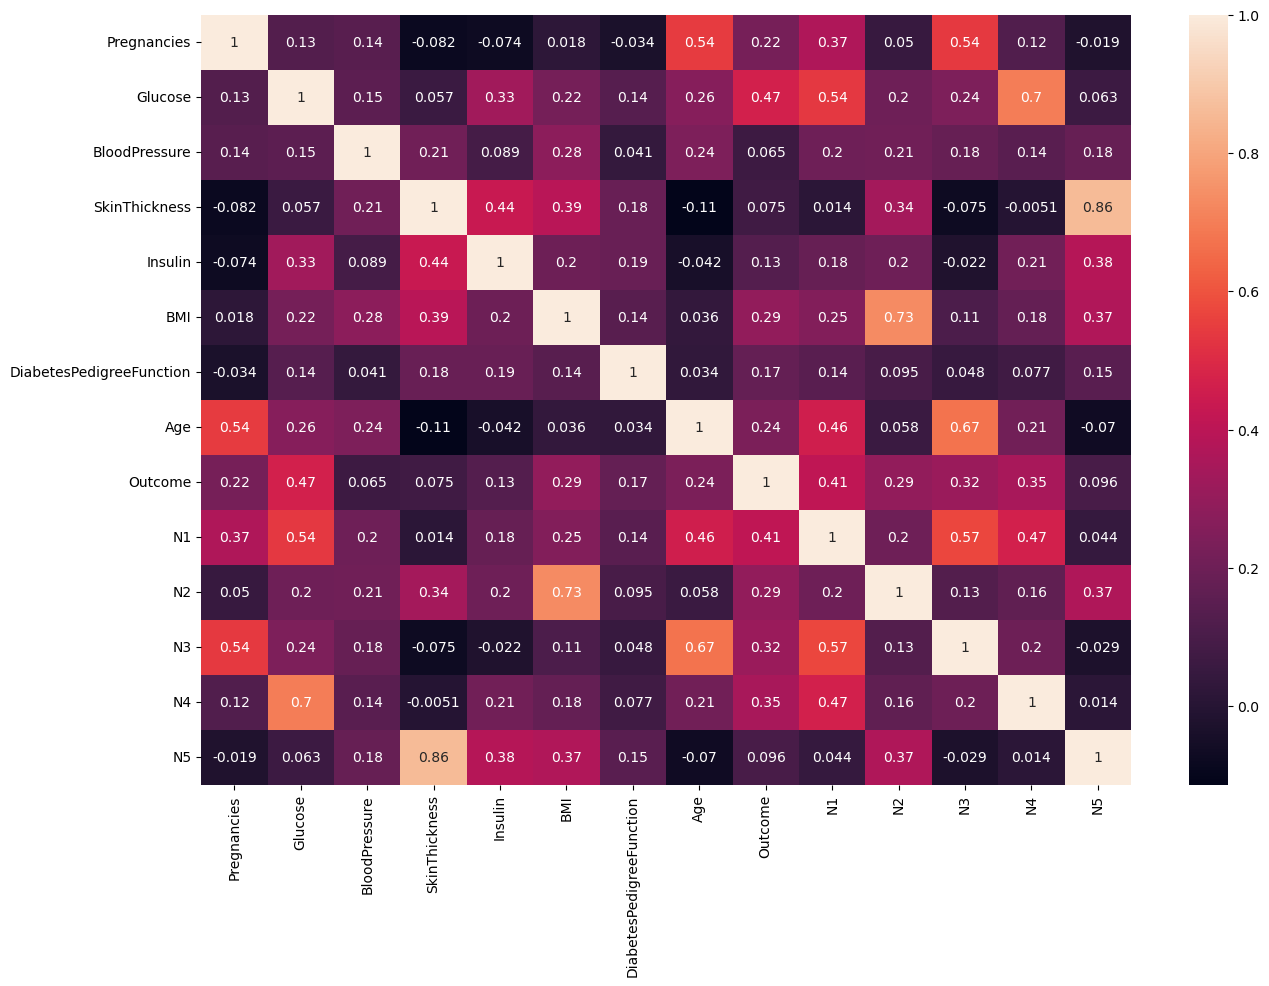

In [31]:
# correlation matrix to show correlation between two variable,0,x means X% similar
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [31]:
# for Example correlation between Glucose and Outcome is 47% that means output depends majority on Glucose

### checking which columns are useful or not

Text(0.5, 1.0, 'Glucose')

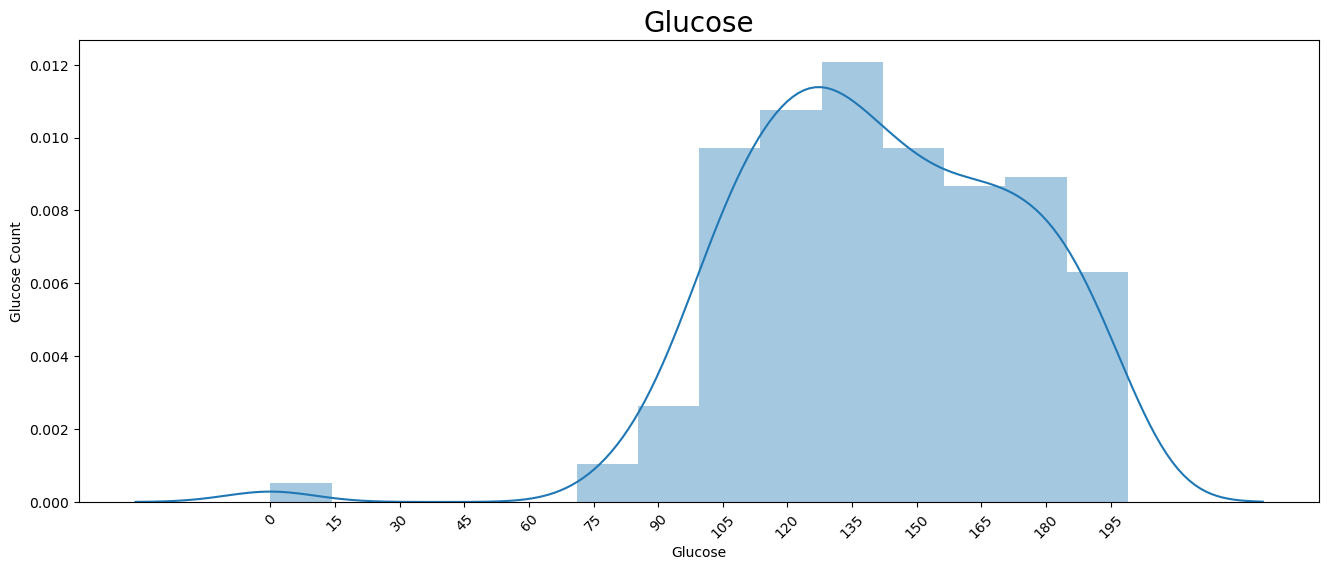

In [21]:
#Glucose for Diabetic
fig = plt.figure(figsize=(16,6))

sns.distplot(df["Glucose"][df["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation=45)
plt.ylabel("Glucose Count")
plt.title("Glucose",fontsize=20)


Text(0.5, 1.0, 'Insuline')

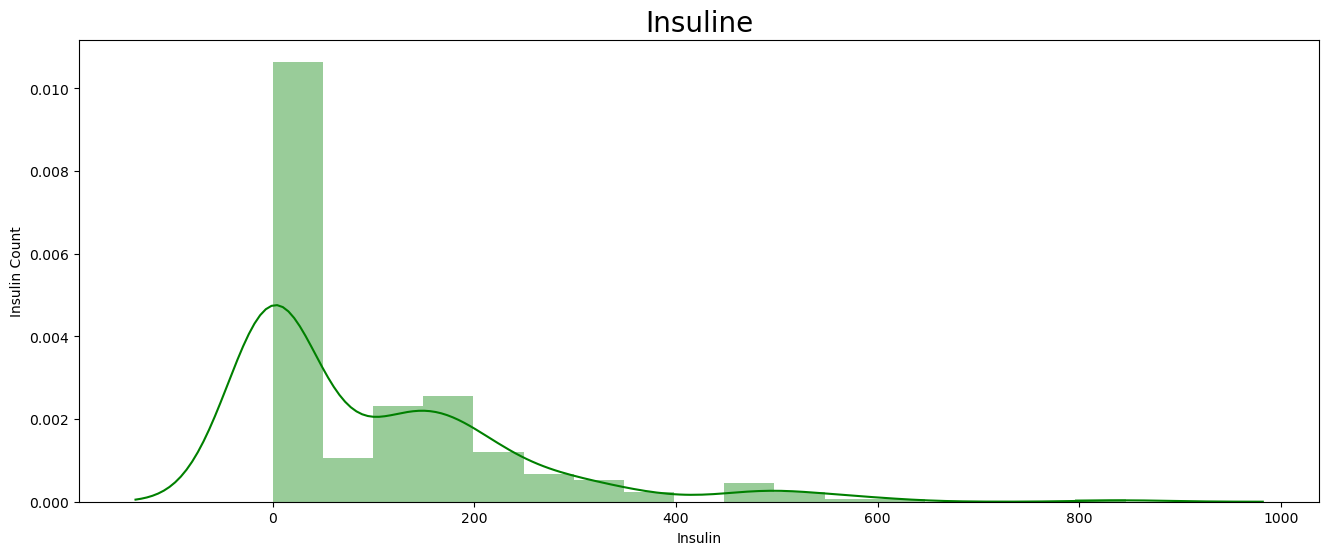

In [22]:
#insulin for Diabetic
fig = plt.figure(figsize=(16,6))

sns.distplot(df["Insulin"][df["Outcome"] == 1],color="g")
plt.xticks()
plt.ylabel("Insulin Count")
plt.title("Insuline",fontsize=20)

Text(0.5, 1.0, 'BMI')

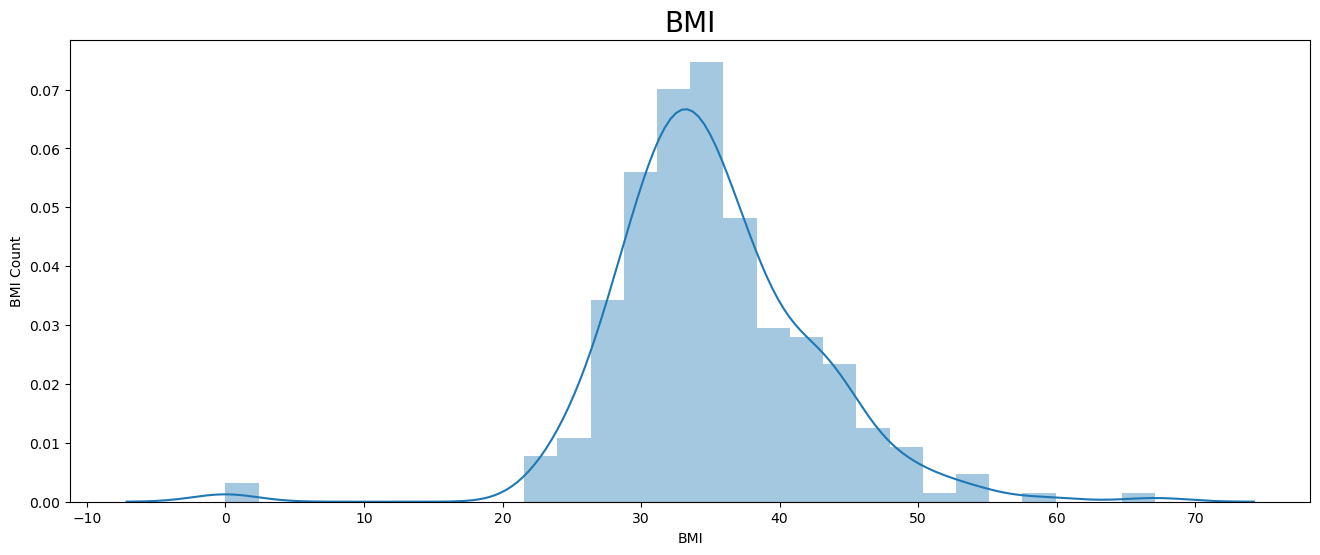

In [23]:
#BMI for Diabetic
fig = plt.figure(figsize=(16,6))

sns.distplot(df["BMI"][df["Outcome"] == 1])
plt.xticks()
plt.ylabel("BMI Count")
plt.title("BMI",fontsize=20)

Text(0.5, 1.0, 'DiabetesPedigreeFunction')

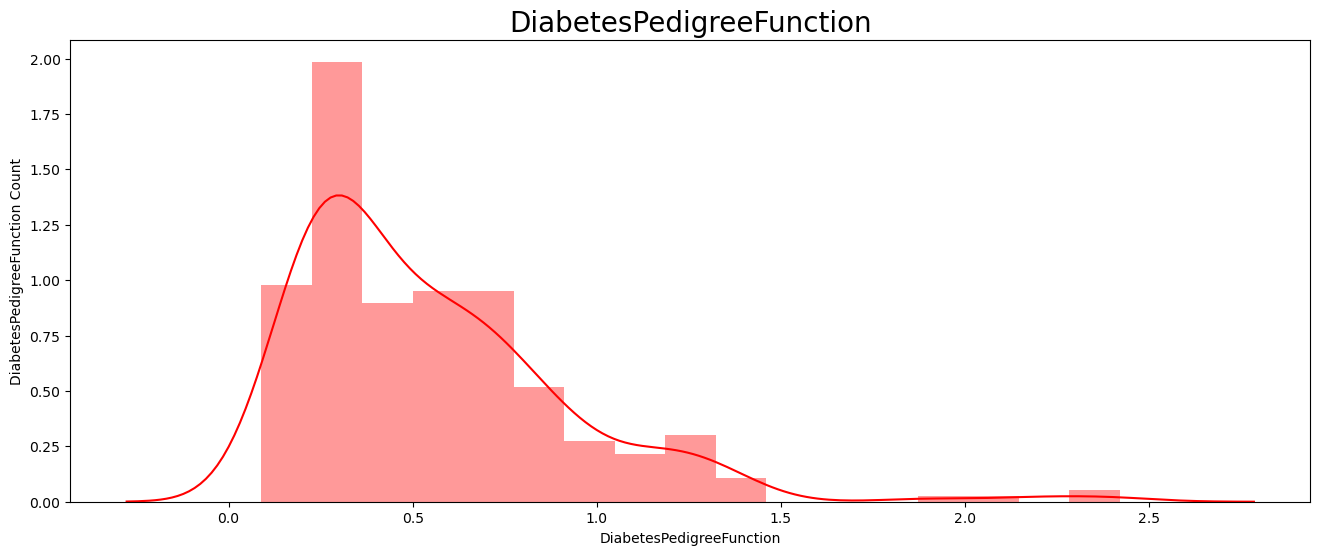

In [24]:
#DiabetesPedigreeFunction for Diabetic
fig = plt.figure(figsize=(16,6))

sns.distplot(df["DiabetesPedigreeFunction"][df["Outcome"] == 1],color="r")
plt.xticks()
plt.ylabel("DiabetesPedigreeFunction Count")
plt.title("DiabetesPedigreeFunction",fontsize=20)

Text(0.5, 1.0, 'BloodPressure')

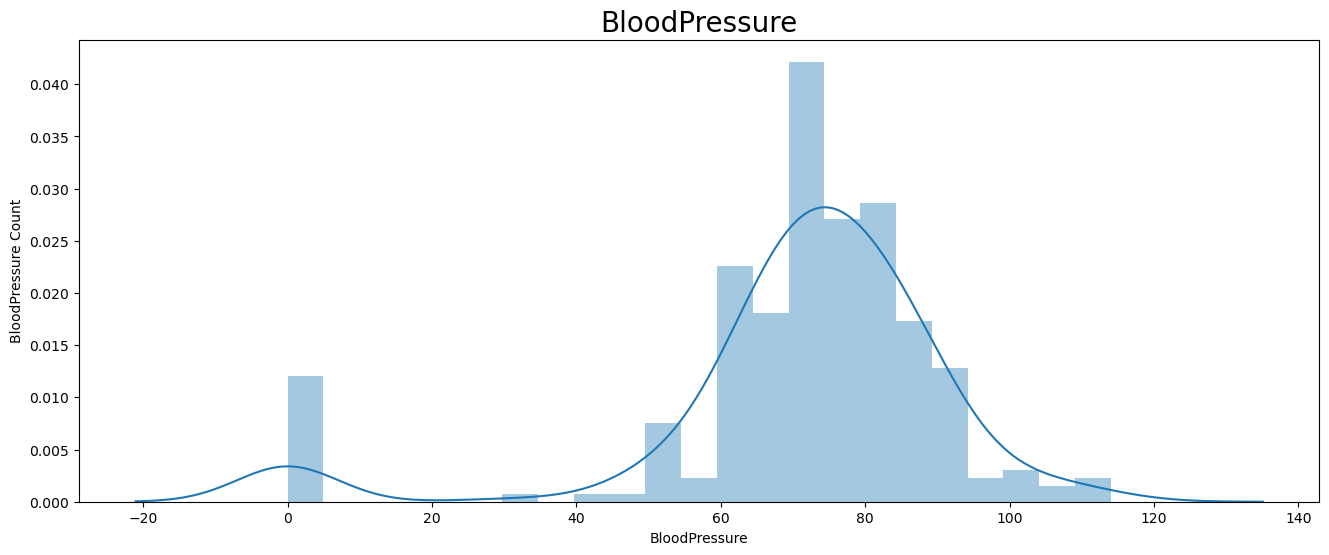

In [25]:
#BloodPressure for Diabetic
fig = plt.figure(figsize=(16,6))

sns.distplot(df["BloodPressure"][df["Outcome"] == 1])
plt.xticks()
plt.ylabel("BloodPressure Count")
plt.title("BloodPressure",fontsize=20)

Text(0.5, 1.0, 'Age')

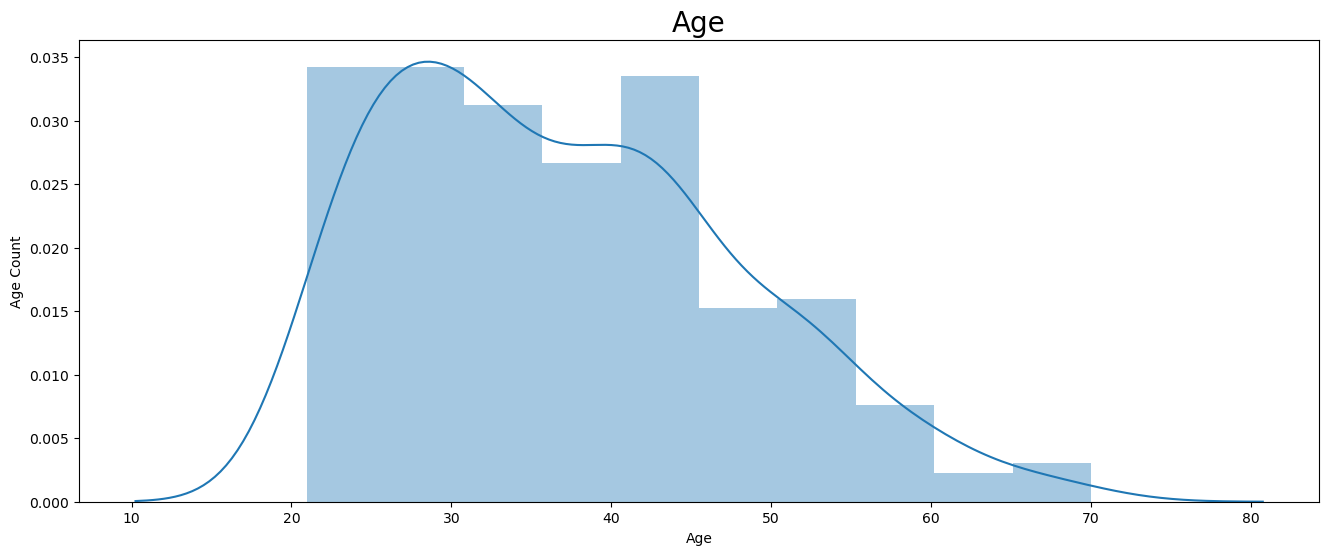

In [26]:
# Age for Diabetic
fig = plt.figure(figsize=(16,6))

sns.distplot(df["Age"][df["Outcome"] == 1])
plt.xticks()
plt.ylabel("Age Count")
plt.title("Age",fontsize=20)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>,
        <AxesSubplot:title={'center':'SkinThickness'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Outcome'}>,
        <AxesSubplot:title={'center':'N1'}>,
        <AxesSubplot:title={'center':'N2'}>,
        <AxesSubplot:title={'center':'N3'}>],
       [<AxesSubplot:title={'center':'N4'}>,
        <AxesSubplot:title={'center':'N5'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

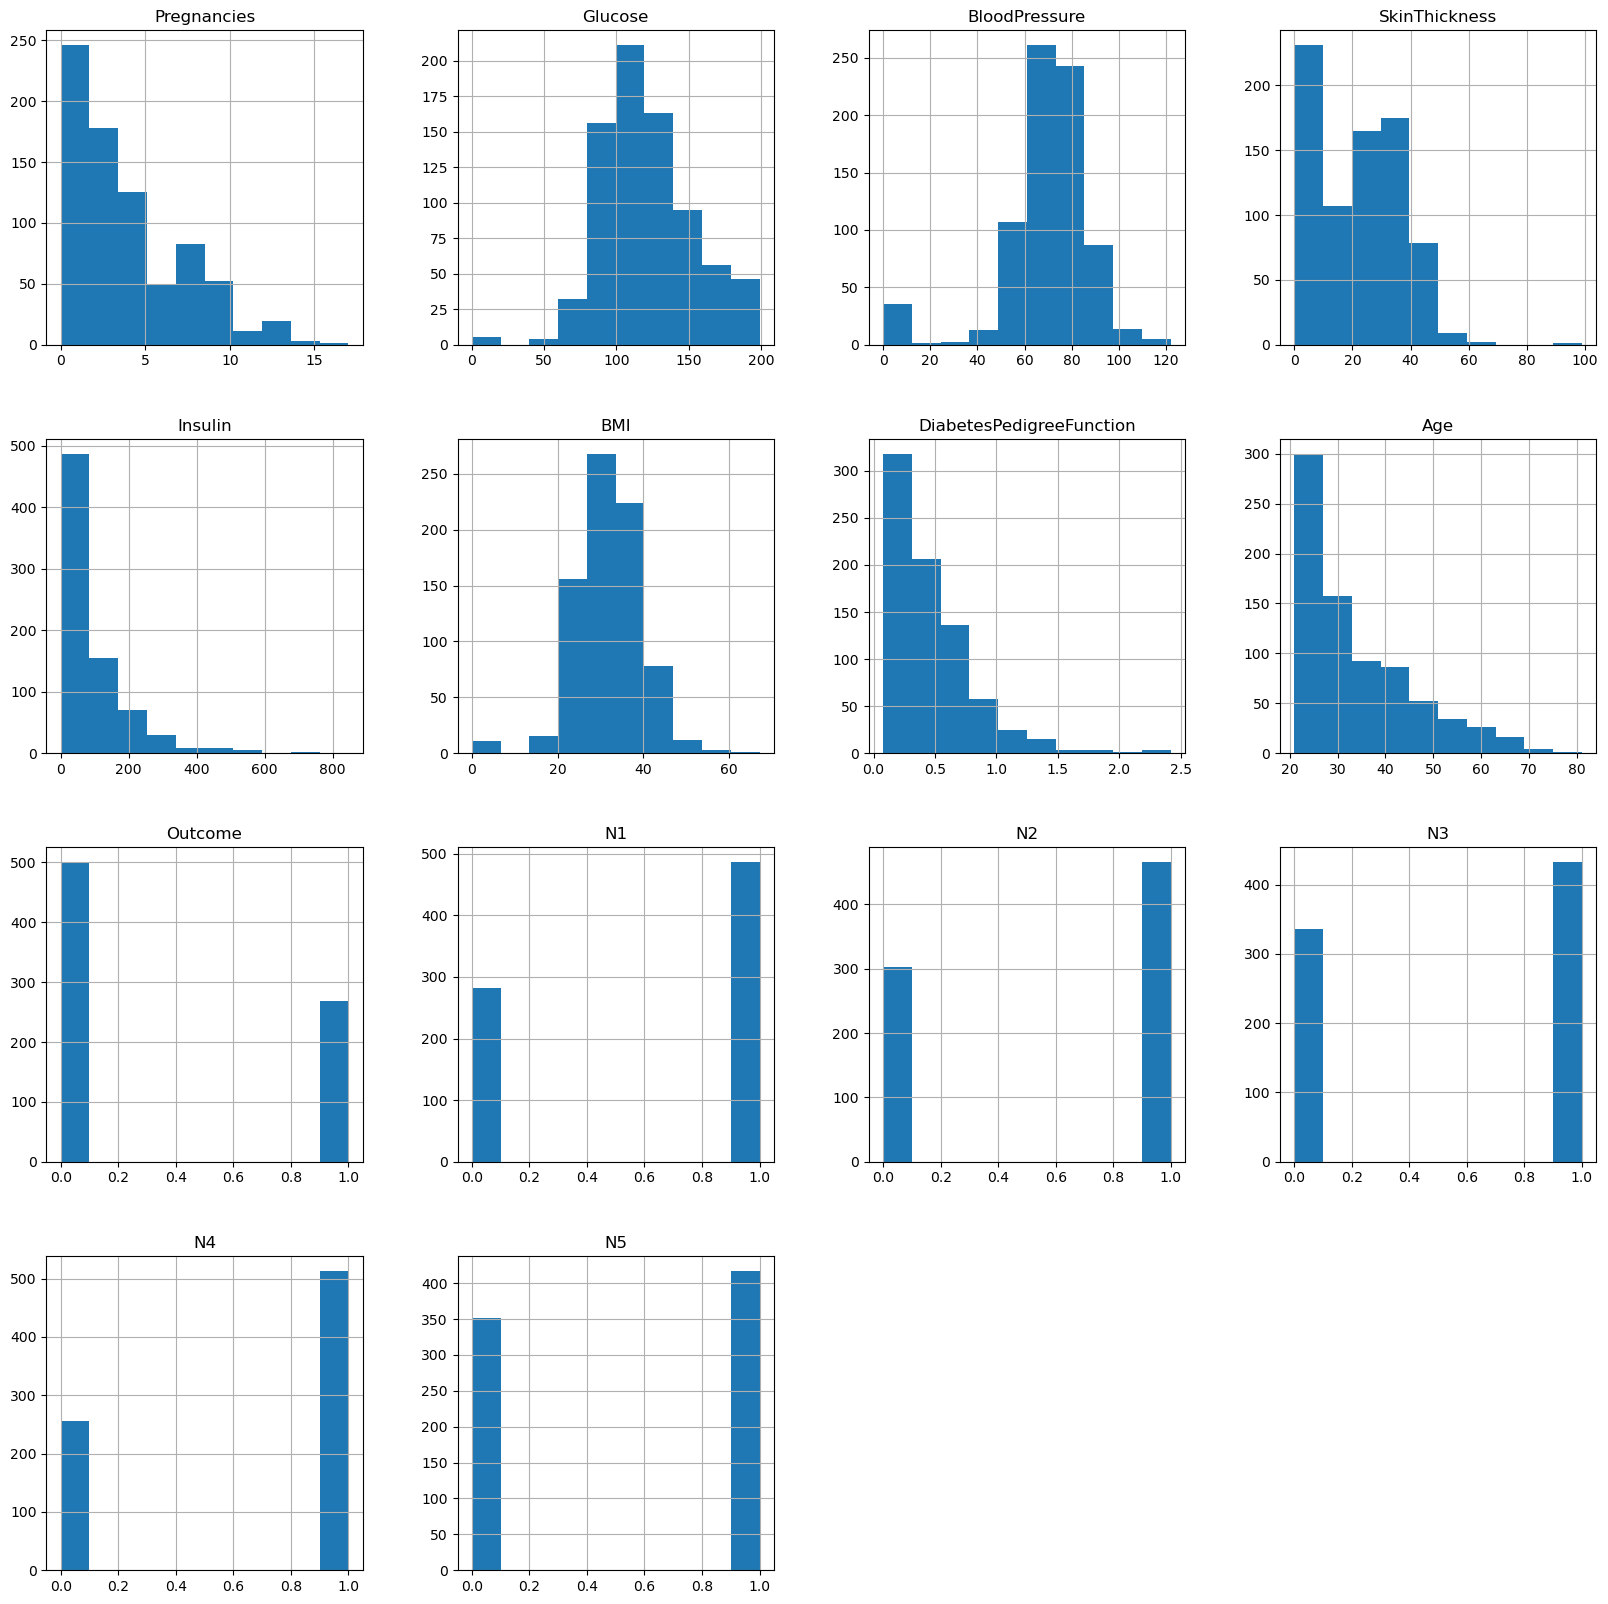

In [27]:
df.hist(figsize=(20,20))

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

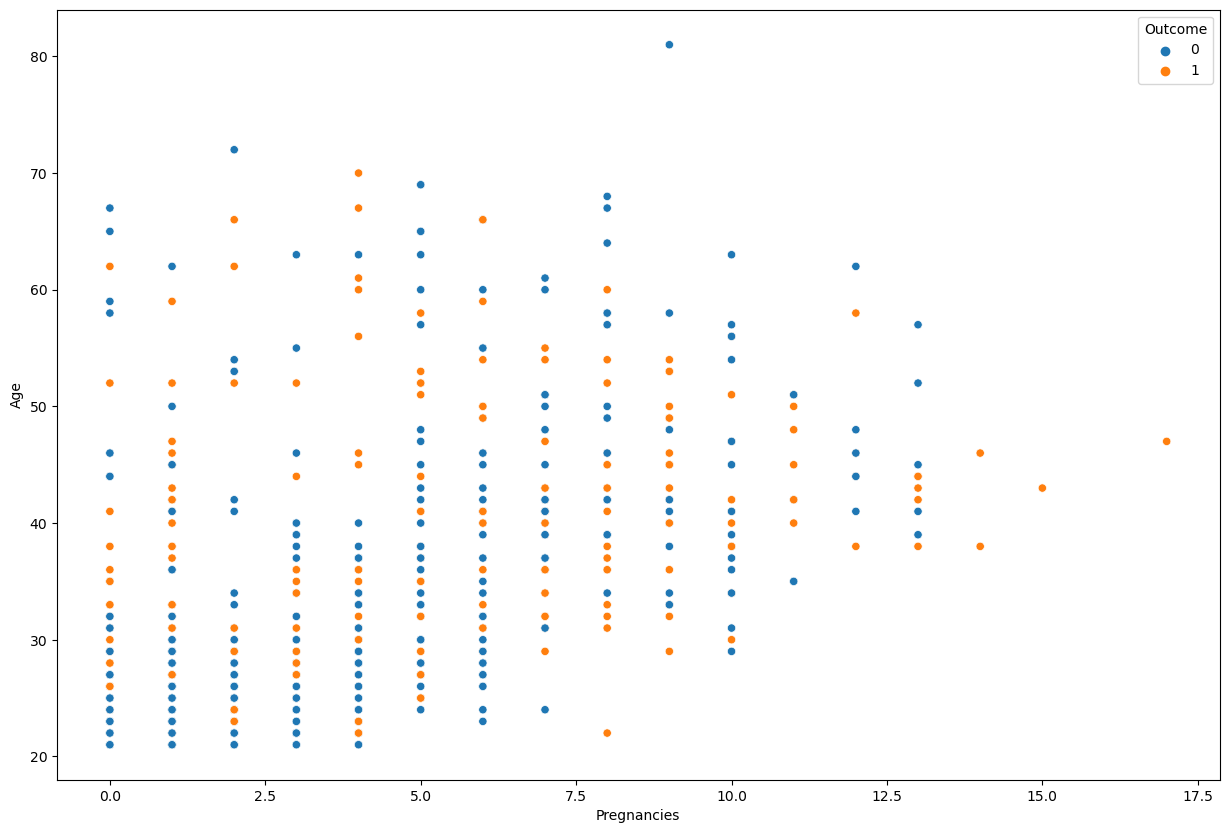

In [28]:
#Pregnancies vs outcomes
plt.figure(figsize=(15,10))
sns.scatterplot(data = df,x="Pregnancies",y="Age",hue="Outcome")

### Outcome has 1 and 0 values where 1 indicates that person has diabetes and 0 shows person has no diabetes. This is my label column in dataset.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

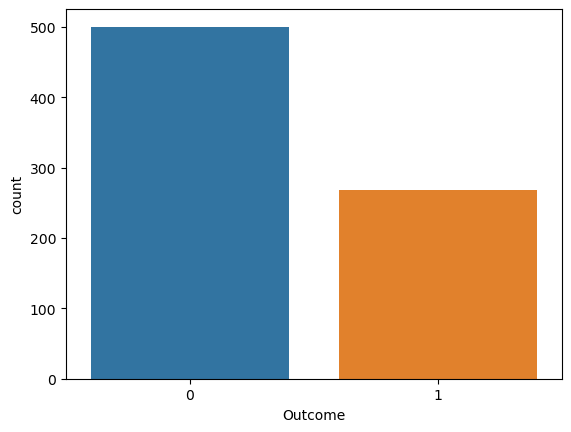

In [29]:
#Counting values of outcomes having 0 or 1,0 means non diabetic and 1 means diabetic
sns.countplot('Outcome', data = df)

### # Glucose vs BMI vs Age

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

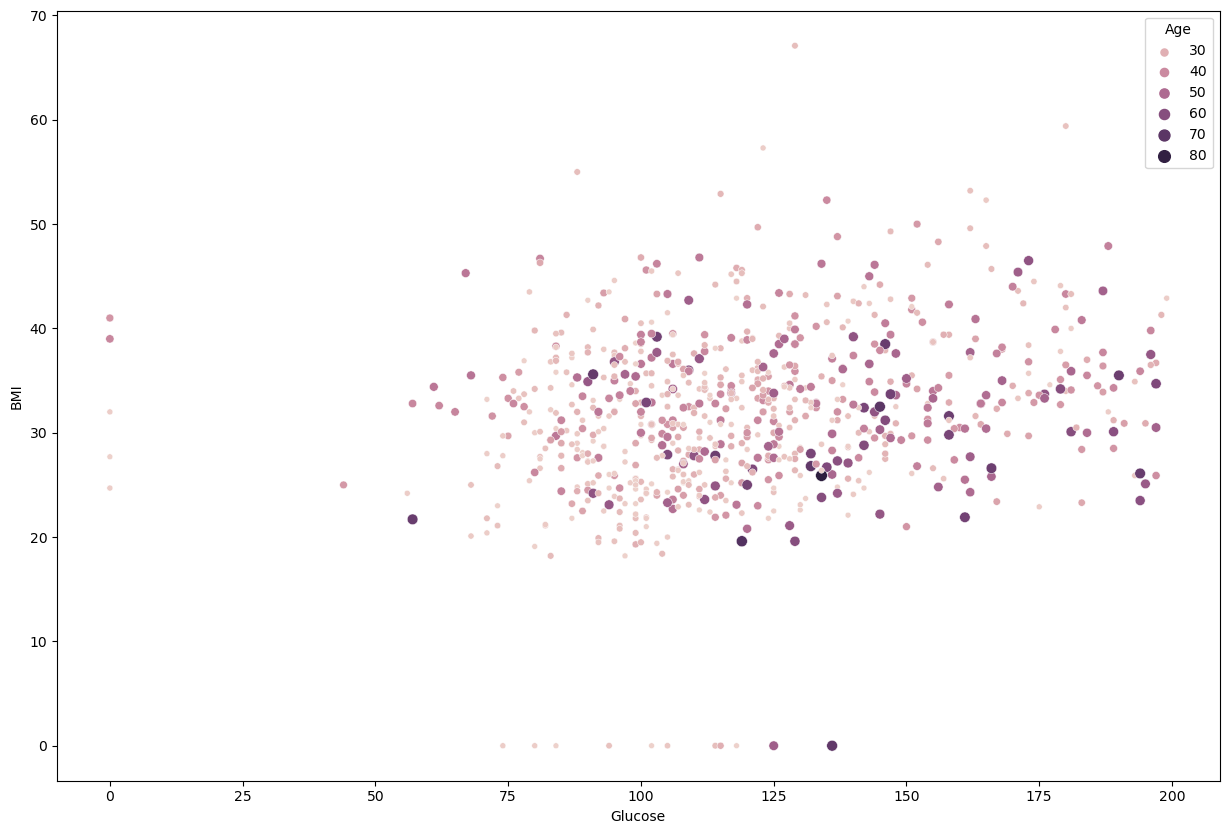

In [30]:
# Glucose vs BMI vs Age

plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

In [39]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,N2,N3,N4,N5
0,6,148,72,35,0,33.6,0.627,50,1,1,1,1,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1,0,1,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1,0,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,1,0,0,1
764,2,122,70,27,0,36.8,0.340,27,0,1,1,0,1,1
765,5,121,72,23,112,26.2,0.245,30,0,1,0,1,1,1
766,1,126,60,0,0,30.1,0.349,47,1,1,1,1,1,0


<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

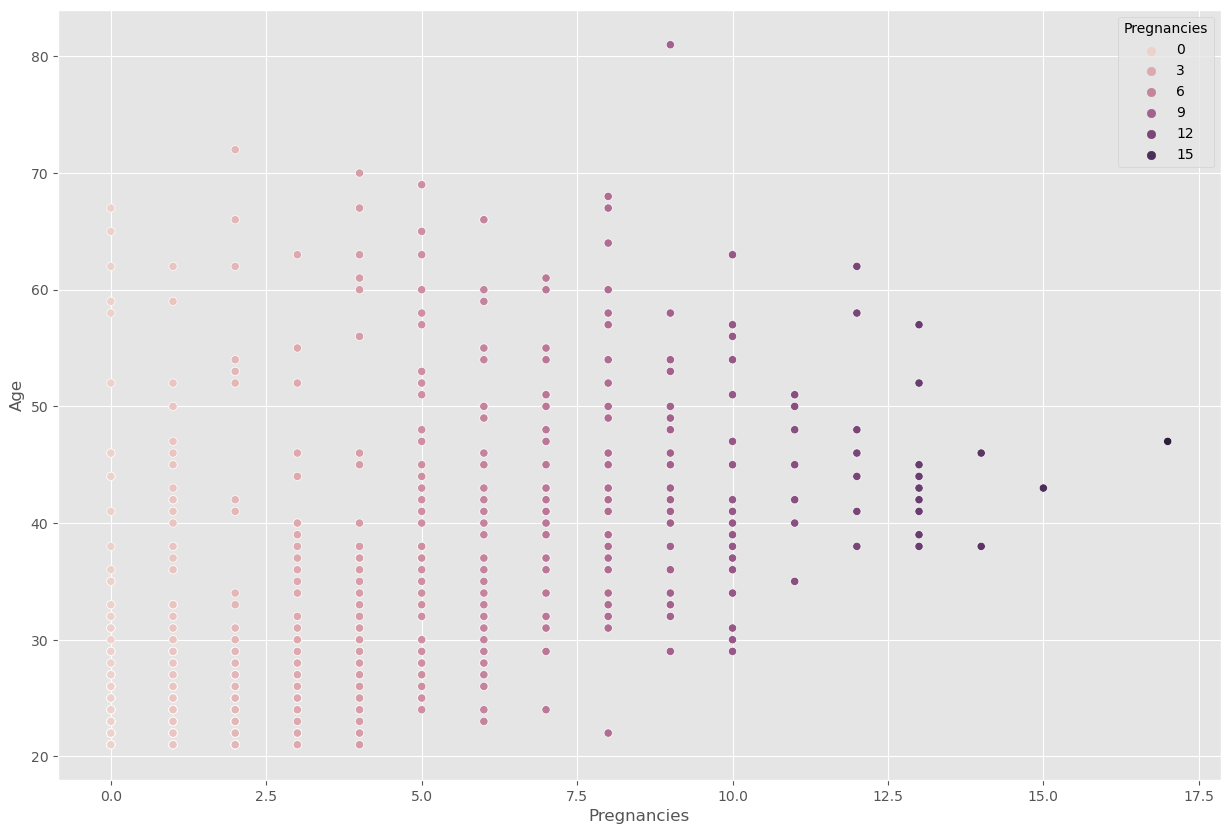

In [31]:
#Pregnancies vs Age
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="Pregnancies", y="Age", hue="Pregnancies")

<AxesSubplot:xlabel='BloodPressure', ylabel='Age'>

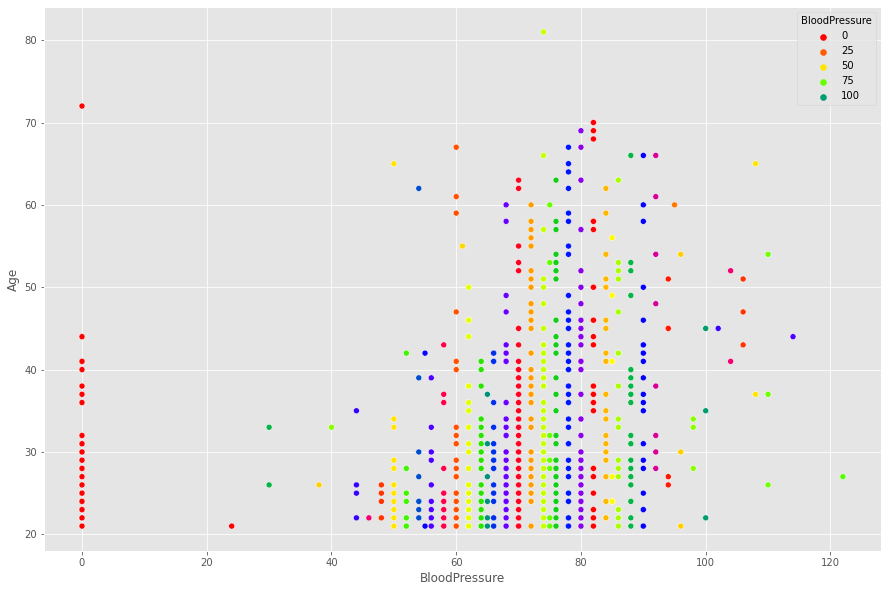

In [44]:
#BloodPressure vs Age
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="BloodPressure", y="Age", hue="BloodPressure",palette="prism")

<AxesSubplot:xlabel='Age', ylabel='SkinThickness'>

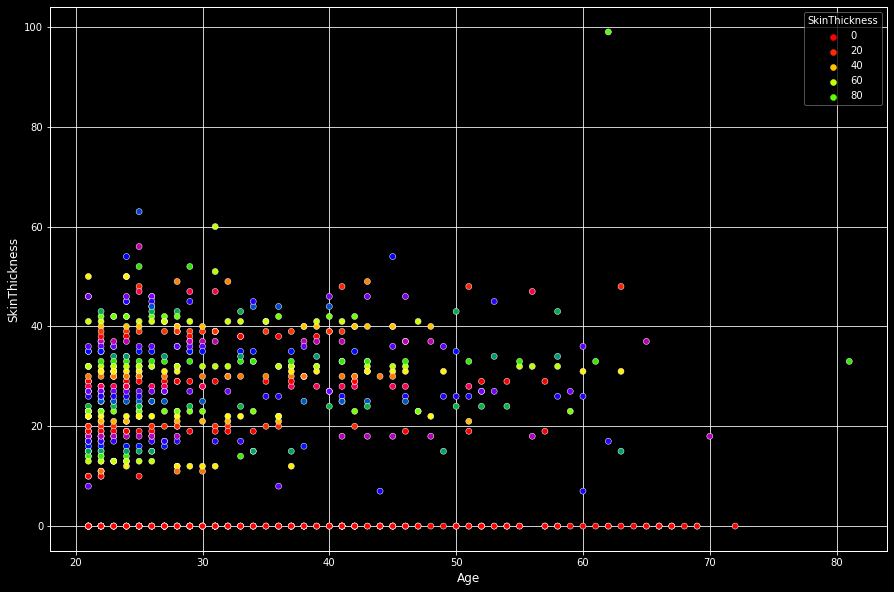

In [45]:
#Age vs SkinThickness
plt.style.use("dark_background")
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="Age", y="SkinThickness",palette="prism",hue="SkinThickness")

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

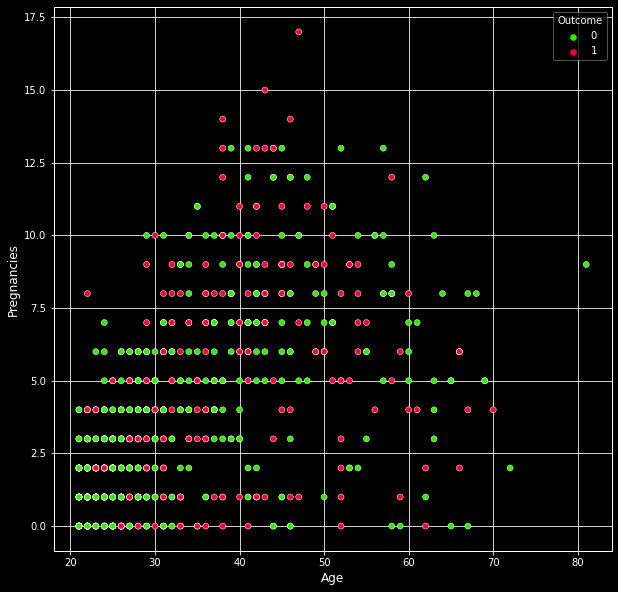

In [46]:
#Using Age and Pregnanacies collect outcome
plt.style.use("dark_background")
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="Age", y="Pregnancies",palette="prism",hue="Outcome")

### Importing Dependencies

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,N2,N3,N4,N5
0,6,148,72,35,0,33.6,0.627,50,1,1,1,1,1,1
1,1,85,66,29,39,26.6,0.351,31,0,1,0,1,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1,0,1,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,1,0,0,1
764,2,122,70,27,39,36.8,0.340,27,0,1,1,0,1,1
765,5,121,72,23,112,26.2,0.245,30,0,1,0,1,1,1
766,1,126,60,0,0,30.1,0.349,47,1,1,1,1,1,0


In [34]:
#seperating the data and labels
X= df.drop(columns='Outcome',axis=1)
Y=df['Outcome']

In [35]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  N1  N2  N3  N4  N5  
0                       0.627   50   1   1   1   1   1

In [36]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standarization

In [37]:
scaler=StandardScaler()

In [38]:
scaler.fit(X)

StandardScaler()

In [39]:
standardized_data=scaler.transform(X)

In [40]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.8819171 ,
         0.70503619,  0.9174566 ],
       [-0.84488505, -1.12339636, -0.16054575, ...,  0.8819171 ,
        -1.41836692,  0.9174566 ],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.8819171 ,
         0.70503619, -1.08996981],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.8819171 ,
         0.70503619,  0.9174566 ],
       [-0.84488505,  0.1597866 , -0.47073225, ...,  0.8819171 ,
         0.70503619, -1.08996981],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -1.13389342,
        -1.41836692,  0.9174566 ]])

In [41]:
X=standardized_data
Y=df['Outcome']

In [42]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.8819171 ,
         0.70503619,  0.9174566 ],
       [-0.84488505, -1.12339636, -0.16054575, ...,  0.8819171 ,
        -1.41836692,  0.9174566 ],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.8819171 ,
         0.70503619, -1.08996981],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.8819171 ,
         0.70503619,  0.9174566 ],
       [-0.84488505,  0.1597866 , -0.47073225, ...,  0.8819171 ,
         0.70503619, -1.08996981],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -1.13389342,
        -1.41836692,  0.9174566 ]])

In [43]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Train Test Split

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [59]:
#x_test is predicted data and check the accuracy
#y_train is all labels of extrem data
#y_test is all label is 0 or 1 
#0.2 is 20% data 
#Stratify=Y is split the data into 0 or 1


In [45]:
X.shape,X_train.shape,X_test.shape

((768, 13), (614, 13), (154, 13))

### Training the model

In [46]:
classifier=svm.SVC(kernel='linear')

#svm is support vecter mechine
#svc is support vecter classifier

In [47]:
#training the support vector Machine Classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evaluation

### Accuracy Score

In [48]:
#accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [49]:
print("Accuracy score of the training data:",training_data_accuracy)

Accuracy score of the training data: 0.7850162866449512


In [50]:
#accuracy score on the test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [51]:
print("Accuracy score of the test data:",test_data_accuracy)

Accuracy score of the test data: 0.7727272727272727


### Making a predictive System

In [54]:
#input_data=( 1,89,66,23,94,28.1,0.627,50,11,11,11,66,55)
input_data=(1,1,85,66,29,39,26.6,0.351,31,1,0,1,0)

#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


#standarized the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if( prediction[0] == 0):
    print("The person is not diabetic")
else:
     print("The person is diabetic")

[[-0.84488505 -3.75235657  0.8217115   2.85183982 -0.44108659  0.8893767
  78.91003438 -2.79852645 62.99746911  0.80722544 -1.13389342  0.70503619
  -1.08996981]]
[1]
The person is diabetic


In [55]:
import pickle
filename='trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [56]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [59]:
input_data=( 1,89,66,23,94,28.1,0.627,50,1,0,1,0,1)

#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


#standarized the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if( prediction[0] == 0):
    print("The person is not diabetic")
else:
     print("The person is diabetic")

[[-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
   0.46849198  1.4259954   0.7617394  -1.23881131  0.8819171  -1.41836692
   0.9174566 ]]
[0]
The person is not diabetic


### Linear Regression model

In [63]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,Y_train) 


LogisticRegression()

In [20]:
Y_pred=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Training Score:\n",reg.score(X_train,Y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(Y_test,Y_pred))
print("R2 score is:\n",r2_score(Y_test,Y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154

Confusion Matrix:
 [[89 11]
 [26 28]]
Training Score:
 78.50162866449512
Mean Squared Error:
 0.24025974025974026
R2 score is:
 -0.05518518518518545


In [22]:
print(accuracy_score(Y_test,Y_pred)*100)

75.97402597402598


### KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [25]:
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred))
print("Training Score:\n",knn.score(X_train,Y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(Y_test,y_pred))
print("R2 score is:\n",r2_score(Y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79       100
           1       0.62      0.39      0.48        54

    accuracy                           0.70       154
   macro avg       0.67      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154

Confusion Matrix:
 [[87 13]
 [33 21]]
Training Score:
 81.59609120521174
Mean Squared Error:
 0.2987012987012987
R2 score is:
 -0.31185185185185227


In [26]:
print(accuracy_score(Y_test,y_pred)*100)

70.12987012987013
